# Developer Survey Data Analysis Project

## Step 1: Install and Import Libraries

In [83]:
# Install required libraries

!pip install pandas   # Read and Analyze Data
!pip install matplotlib  # Draw Graphs
!pip install seaborn     # Beautiful Graphs Made Easy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Step 2: Load and Preview the Dataset

In [84]:
#Step 1:  Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Step 2: Set pandas option to display all columns
pd.set_option('display.max_columns', None)

#Step 3:  Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [85]:
# Check the Size of the Dataset (Rows and Columns
df.shape

(65437, 114)

 #### ** * The dataset has been loaded successfully with 65437 Rows and 114 Columns.
 

## Step 3: Handling Missing Data
### Dealing with Missing Data (Employment, Job Satisfaction, Remote Work)

In [86]:
#  Explore and understand the columns.

# Step 1: Check basic info
df[['Employment', 'JobSat', 'RemoteWork']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Employment  65437 non-null  object 
 1   JobSat      29126 non-null  float64
 2   RemoteWork  54806 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


### Key Insights:
* Employment: No missing values (text data)
* JobSat: Many missing values (numeric)
* RemoteWork: Some missing values (text)
* Conclusion:
* JobSat and RemoteWork need cleaning.

In [87]:
# Step 2: View sample values
df[['Employment', 'JobSat', 'RemoteWork']].head()


,Employment,JobSat,RemoteWork
0,"Employed, full-time",NaN,Remote
1,"Employed, full-time",NaN,Remote
2,"Employed, full-time",NaN,Remote
3,"Student, full-time",NaN,NaN
4,"Student, full-time",NaN,NaN


In [88]:
# Step 3: List unique values
for col in ['Employment', 'JobSat', 'RemoteWork']:
    print(col)
    print(df[col].value_counts(dropna=False))
    print("\n")


Employment
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Indepen

### Key Insights:
* Employment → many job types and combinations
* JobSat → rating numbers, but lots of missing values
* RemoteWork → hybrid & remote are most common; some missing

In [89]:
# Step 4: Check Missing Values (count + percentage)

# 4.1:  Count missing values in each column
missing_count = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()


# 4.2:  Percentage of missing values
missing_percent = (missing_count / len(df)) * 100

print("Missing Values (Count):")
print(missing_count)

print("\nMissing Values (%)")
print(missing_percent.round(2))


Missing Values (Count):
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing Values (%)
Employment     0.00
JobSat        55.49
RemoteWork    16.25
dtype: float64


In [90]:
# Step 5: Drop rows where Employment is missing (important column)
df = df.dropna(subset=['Employment'])

# Step 6: Fill missing JobSat with "Not Specified"
df['JobSat'] = df['JobSat'].fillna('Not Specified')

# Step 7: Fill missing RemoteWork with the most common value (mode)
most_common_remote=df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_common_remote)

# step 8: Verify after cleaning
print("Missing values after cleaning:\n")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Missing values after cleaning:

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


## Step 4: Analysis of Experience and Job Satisfaction


In [91]:
# Step 1: Check basic info
df[['YearsCodePro','JobSat']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearsCodePro  51610 non-null  object
 1   JobSat        65437 non-null  object
dtypes: object(2)
memory usage: 1022.6+ KB


### Key Insights:
* YearsCodePro: Some values missing + stored as text
* JobSat: No missing values, but stored as text
* Next step: Convert both to numeric and drop missing YearsCodePro before analysis

In [92]:
# Step 2: Show unique values with their counts
for col in ['YearsCodePro', 'JobSat']:
    print(f"\nUnique values and counts in {col}:\n")
    print(df[col].value_counts(dropna=False))



Unique values and counts in YearsCodePro:

YearsCodePro
NaN                   13827
2                      4168
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
40                 

### Key Insights:
* YearsCodePro: Many values + some text values ( Less than 1 year,More than 50 years )  + 13,827 missing → needs cleaning
* JobSat: Mostly numeric scores (0–10) + “Not Specified” values


In [93]:
# Step 3: Convert YearsCodePro to numeric

# 3.1: Convert Text Experience Values to Numeric Values (Mapping)
exp_map = {
    "Less than 1 year": 0.5,
    "More than 50 years": 50
}

# 3.2: Convert YearsCodePro to Numeric (after mapping text values)

df['YearsCodePro_num'] = pd.to_numeric(
    df['YearsCodePro'].replace(exp_map),
    errors='coerce'
)

# Step 4: Convert JobSat to numeric
df['JobSat_num'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 5: Keep only rows with valid values
exp_df = df[['YearsCodePro_num', 'JobSat_num']].dropna()

# Step 6: Verify
exp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 12 to 65412
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearsCodePro_num  28356 non-null  float64
 1   JobSat_num        28356 non-null  float64
dtypes: float64(2)
memory usage: 664.6 KB


* No missing values in either column
* Both columns are now numeric (float64)

In [94]:
# Step 7: Summarize YearsCodePro
exp_df['YearsCodePro_num'].describe()

count    28356.000000
mean        10.308083
std          8.487092
min          0.500000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro_num, dtype: float64

### Key Insights:
* Total valid records analyzed: 28,356
* Average experience: 10.3 years
* Median experience (50% point): 8 years
* Most developers fall between: 4 and 15 years (middle range)
* Minimum: 0.5 years
* Maximum: 50 years

In [95]:
# Step 8: Create experience ranges (bins)
bins = [0, 5, 10, 20, 100]
labels = ['0–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']

exp_df['ExperienceRange'] = pd.cut(
    exp_df['YearsCodePro_num'],
    bins=bins,
    labels=labels,
    right=False     # left side is inclusive and right side is exclusive
                    
)

# Calculate median Job Satisfaction for each range
median_job_sat = (exp_df.groupby('ExperienceRange')['JobSat_num'].median())

print("\nMedian Job Satisfaction by Experience Range:\n")
print(median_job_sat)





Median Job Satisfaction by Experience Range:

ExperienceRange
0–5 yrs      7.0
5–10 yrs     7.0
10–20 yrs    7.0
20+ yrs      8.0
Name: JobSat_num, dtype: float64


/tmp/ipykernel_328/2742804441.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = (exp_df.groupby('ExperienceRange')['JobSat_num'].median())


### Key Insights:
* Job satisfaction is similar across most experience groups (median = 7)
* Developers with 20+ years of experience have slightly higher satisfaction (median = 8)


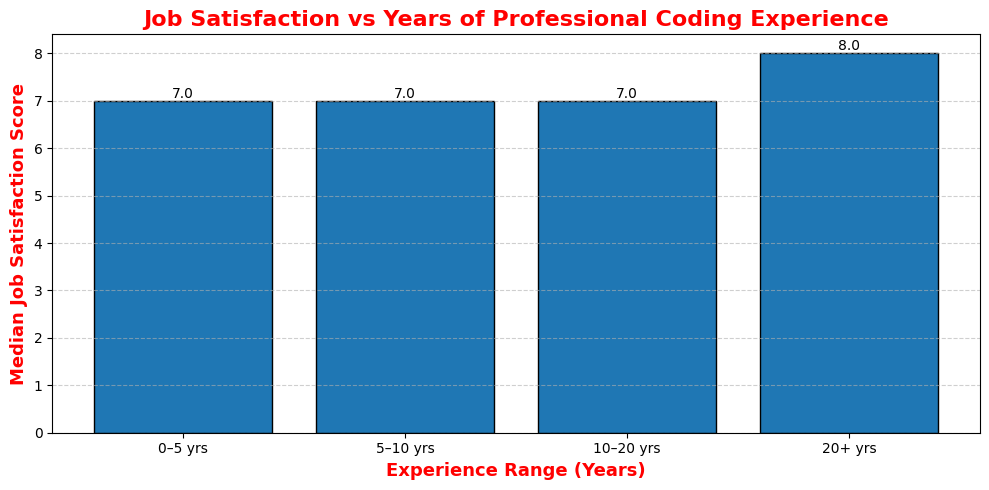

In [96]:

# Step 9: Visualize the relationship using a bar plot
plt.figure(figsize=(10,5))

# Bar chart with color
bars = plt.bar(
    median_job_sat.index.astype(str),
    median_job_sat.values,
    label="Median Job Satisfaction",
    edgecolor="black"
)

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Title & labels (bold)
plt.title("Job Satisfaction vs Years of Professional Coding Experience",
          fontsize=16, fontweight='bold', color="red")

plt.xlabel("Experience Range (Years)", fontsize=13, fontweight='bold', color="red")
plt.ylabel("Median Job Satisfaction Score", fontsize=13, fontweight='bold', color="red")

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve tick readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)



plt.tight_layout()
plt.show()


##  Step 5: Visualize Job Satisfaction

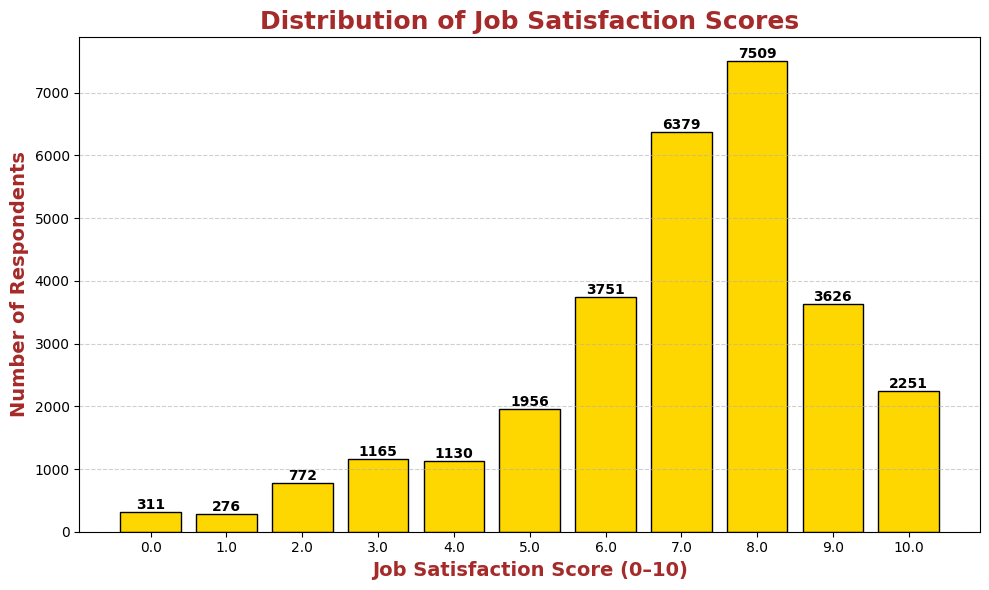

In [97]:
# Step 5 — Visualize Job Satisfaction (Enhanced Count Plot)

# Count JobSat values (ignore "Not Specified")
job_counts = (
    df[df['JobSat_num'].notna()]['JobSat_num']
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(10,6))

# Bar chart
bars = plt.bar(job_counts.index.astype(str), job_counts.values, color="gold",edgecolor="black")

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        
    )

# Title & labels (bold + clear)
plt.title(
    "Distribution of Job Satisfaction Scores",
    fontsize=18,
    fontweight="bold", color="brown"
)
plt.xlabel("Job Satisfaction Score (0–10)", fontsize=14, fontweight="bold", color="brown")
plt.ylabel("Number of Respondents", fontsize=14, fontweight="bold", color="brown")

# Improve axis readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add clean grid
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Reduce empty margins and improve layout
plt.tight_layout()

plt.show()


### Key Insights:

* Most people chose job satisfaction scores between 6 and 9
* Only a small number of people chose very low scores
* This means most respondents are happy with their jobs

## Step 6: Analyzing Remote Work Preferences by Job Role

In [98]:
# Task 1:  Remote Work Preference Count Plot
# Step 1: Check missing values in the two columns
df[['RemoteWork', 'Employment']].isnull().sum()


RemoteWork    0
Employment    0
dtype: int64

In [99]:
# Step 2: Check unique values (to understand categories)
print(df['RemoteWork'].value_counts(dropna=False))
print(df['Employment'].value_counts(dropna=False).head(20))


RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64
Employment
Employed, full-time                                                                        39041
Independent contractor, freelancer, or self-employed                                        4846
Student, full-time                                                                          4709
Employed, full-time;Independent contractor, freelancer, or self-employed                    3557
Not employed, but looking for work                                                          2341
Employed, part-time                                                                         1266
Student, full-time;Employed, part-time                                                      1115
Employed, full-time;Student, full-time                                                       897
Employed, full-time;Student, part-time

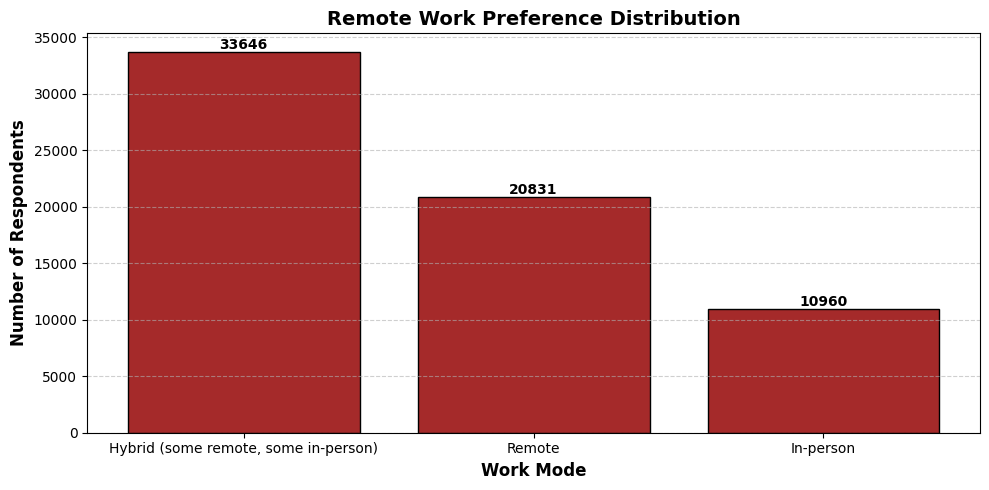

In [100]:
# Step 3: Remote Work Preference Count Plot (Distribution of Remote Work Preferences)

remote_counts = df['RemoteWork'].value_counts()
plt.figure(figsize=(10,5))
bars = plt.bar(remote_counts.index.astype(str), remote_counts.values,
               color="brown", edgecolor="black")

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,
             bar.get_height(),
             int(bar.get_height()),
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Remote Work Preference Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Work Mode", fontsize=12, fontweight="bold")
plt.ylabel("Number of Respondents", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Key Insights:
* Most respondents prefer Hybrid work (some remote, some in-person).
* The second-largest group prefers fully Remote work.
* The smallest group works fully In-person.

In [101]:
# Task 2:  Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.

# Step 1: Create a Clean Employment Type Column
df['Employment_Main'] = df['Employment'].str.split(';').str[0]
# Verify
df[['Employment','Employment_Main']].head(10)


,Employment,Employment_Main
0,"Employed, full-time","Employed, full-time"
1,"Employed, full-time","Employed, full-time"
2,"Employed, full-time","Employed, full-time"
3,"Student, full-time","Student, full-time"
4,"Student, full-time","Student, full-time"
5,"Student, full-time","Student, full-time"
6,"Employed, full-time","Employed, full-time"
7,"Student, full-time;Not employed, but looking f...","Student, full-time"
8,"Employed, full-time","Employed, full-time"
9,"Independent contractor, freelancer, or self-em...","Independent contractor, freelancer, or self-em..."


In [102]:
# Step 2: Cross-tab: Remote Work vs Employment Type
# Step 6-C — Cross-tab (percentage by employment type)

remote_by_employment = pd.crosstab(
    df['Employment_Main'],
    df['RemoteWork'],
    normalize='index'
).round(2)

print("\nRemote Work Preference by Employment Type (%):\n")
print(remote_by_employment)



Remote Work Preference by Employment Type (%):

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment_Main                                                                            
Employed, full-time                                                                 0.44   
Employed, part-time                                                                 0.46   
I prefer not to say                                                                 1.00   
Independent contractor, freelancer, or self-emp...                                  0.29   
Not employed, and not looking for work                                              1.00   
Not employed, but looking for work                                                  0.88   
Retired                                                                             1.00   
Student, full-time                                                                  0.87   
Student, part-time             

### Key Insights:
* Full-time workers: mostly hybrid
* Part-time workers: mostly hybrid
* Freelancers: mostly remote
* Students: mostly hybrid
* Retired/unemployed: ignore (very few people)
* Short takeaway:
 * Hybrid is most common

# Step 7: Analyzing Programming Language Trends by Region

In [103]:
# Task 1: Filter data by country or region.Use columns Country, LanguageHaveWorkedWith

# Step 1: Check if the required columns exist
df[['Country', 'LanguageHaveWorkedWith']].head()


,Country,LanguageHaveWorkedWith
0,United States of America,NaN
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,United Kingdom of Great Britain and Northern I...,C#
3,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust


### Key Insights:
* Both columns are exist.
* Some rows have missing language data.
* Languages are stored as lists separated by “;”.

In [104]:
# Step 2: Check missing values
df[['Country', 'LanguageHaveWorkedWith']].isnull().sum()


Country                   6507
LanguageHaveWorkedWith    5692
dtype: int64

### Key Insights:
* Country: 6,507 valid rows
* LanguageHaveWorkedWith: 5,692 valid rows
* So about 815 rows are missing language data → we will ignore those rows for analysis

In [105]:
# Step 3: Remove rows where LanguageHaveWorkedWith is missing
df_lang = df.dropna(subset=['LanguageHaveWorkedWith'])
df_lang['LanguageHaveWorkedWith'].isnull().sum()


np.int64(0)

In [106]:
# Step 4:  Check how many countries exist
df['Country'].value_counts().head(20)


Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Switzerland                                               876


In [107]:
# Step 5: Split language lists and expand (explode)
# Each person may list multiple languages like "Python; JavaScript; SQL" — we need to separate them.

# 5.1:  Split languages and expand into separate rows
df_lang_exp = (
    df_lang.assign(
        Language=df_lang['LanguageHaveWorkedWith'].str.split(';')
    )
    .explode('Language')
    .dropna(subset=['Language'])
)

# 5.2: Remove extra spaces
df_lang_exp['Language'] = df_lang_exp['Language'].str.strip()

# 5.3: Choose a region / country to analyze
country = "United States of America"  # Top result
country_df = df_lang_exp[df_lang_exp['Country'] == country] # keep only the rows where the Country column equals the selected country.

# 5.4: Get top programming languages for that region
top_langs = (
    country_df['Language']
    .value_counts()
    .head(10)
)

print("\nTop Programming Languages in", country, ":\n")
print(top_langs)




Top Programming Languages in United States of America :

Language
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
TypeScript                 4173
C#                         3112
Java                       2949
C++                        2607
C                          2225
Name: count, dtype: int64


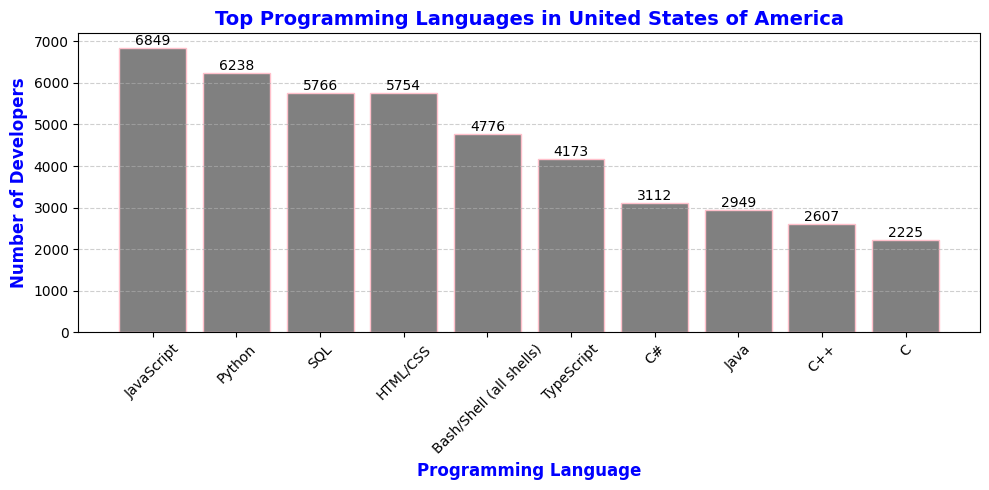

In [108]:
# Step 5.5: Visualize with a bar plot

plt.figure(figsize=(10,5))

bars = plt.bar(top_langs.index, top_langs.values,
               color="grey", edgecolor="pink")

# Add value labels
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,
             bar.get_height(),
             int(bar.get_height()),
             ha="center", va="bottom", fontsize=10)

plt.title(f"Top Programming Languages in {country}",
          fontsize=14, fontweight="bold", color="blue")

plt.xlabel("Programming Language", fontsize=12, fontweight="bold", color="blue")
plt.ylabel("Number of Developers", fontsize=12, fontweight="bold", color="blue")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Key Insights:
* JavaScript and Python are the most used languages in the USA.
* SQL and HTML/CSS are also very popular.
* TypeScript, C#, Java, C++ and C are used by fewer developers compared to the top languages.

## Step 8: Correlation Between Experience and Satisfaction
#### Examine how years of experience (YearsCodePro) correlate with job satisfaction (JobSatPoints_1). Use a scatter plot to visualize this relationship.

In [109]:
# Step 1: Make sure both columns exist
df[['YearsCodePro', 'JobSatPoints_1']].head()

,YearsCodePro,JobSatPoints_1
0,NaN,NaN
1,17,0.0
2,27,NaN
3,NaN,NaN
4,NaN,NaN


Both columns have mising values.

In [110]:
# Step 2: Check missing values
df[['YearsCodePro', 'JobSatPoints_1']].isnull().sum()

YearsCodePro      13827
JobSatPoints_1    36113
dtype: int64

In [111]:
# Step 3: Remove rows where either column is missing
corr_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
corr_df.isnull().sum()


YearsCodePro      0
JobSatPoints_1    0
dtype: int64

In [112]:
# Step 3: See unique values in YearsCodePro_num
df['YearsCodePro'].unique()


array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [113]:
# Step 4: See unique values in JobSatPoints_1_num
df['JobSatPoints_1'].unique()


array([   nan,   0.  ,  50.  ,  10.  ,  90.  ,  30.  ,  20.  ,   5.  ,
         7.  ,  40.  ,  15.  ,  80.  ,  25.  ,  70.  ,  75.  ,  60.  ,
        33.  ,  35.  ,  22.  , 100.  ,  17.  ,   9.  ,   6.  ,   4.  ,
        34.  ,  45.  ,   8.  ,   1.  ,   3.  ,  14.  ,  29.  ,  67.  ,
         2.  ,  18.  ,  95.  ,  11.  ,  13.  ,  55.  ,  65.  ,  19.  ,
        39.  ,  12.5 ,  12.  ,  85.  ,  32.  ,  89.  ,  16.  ,  99.  ,
        71.  ,  27.  ,  57.  ,  77.  ,  26.  ,  88.  ,  78.  ,  76.  ,
        87.  ,  37.  ,  98.  ,  23.  ,  61.  ,   2.5 ,  86.  ,  24.  ,
        56.  ,  74.  ,  69.  ,  96.  ,  13.5 ,  81.  ,  44.  ,  79.  ,
        18.75,  66.  ,  21.  ,  28.  ,  38.  ,  52.  ,  49.  ,   3.75,
        68.  ,  91.  ,  37.5 ,  31.  ,   8.5 ,  63.  ,  47.  ,  97.  ,
        83.  ,  43.  ,   7.5 ,  36.  ])


### Key Insights:
* YearsCodePro - Not numeric.
* JobSatPoints_1_num - satisfaction score is on a 0–100 scale.
  

In [114]:
# Step 5:  Convert YearsCodePro to numeric.
exp_map = {
    "Less than 1 year": 0.5,
    "More than 50 years": 50
}

df['YearsCodePro_num'] = pd.to_numeric(
    df['YearsCodePro'].replace(exp_map),
    errors='coerce'
)

# Step 6: To be safe convert JobSatPoints_1 to numeric.
df['JobSatPoints_1_num'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# verify
df[['YearsCodePro_num', 'JobSatPoints_1_num']].dtypes


YearsCodePro_num      float64
JobSatPoints_1_num    float64
dtype: object

In [115]:
Successfully converted to numeric.

SyntaxError: invalid syntax (4209309642.py, line 1)

In [ ]:
# Step 6: Check missing value
df[['YearsCodePro_num', 'JobSatPoints_1_num']].isnull().sum()


In [ ]:
# Step 7: Remove rows where either column is missing
corr_df = df[['YearsCodePro_num', 'JobSatPoints_1_num']].dropna()

# Verify
corr_df.isnull().sum()


In [ ]:
# Step 5: Relationship Between Coding Experience and Job Satisfaction(Scatter plot)
plt.figure(figsize=(10,5))

# Scatter plot with custom style
plt.scatter(
    corr_df['YearsCodePro_num'],
    corr_df['JobSatPoints_1_num'],
    color="purple",       
    edgecolor="black",
    alpha=0.7,
    s=60,
    label="Developers"
)

# Title & labels (custom colors + bold)
plt.title(
    "Experience vs Job Satisfaction (0–100 Scale)",
    fontsize=16,
    fontweight="bold",
    color="darkred"        
)

plt.xlabel(
    "Years of Professional Coding Experience",
    fontsize=14,
    fontweight="bold",
    color="darkgreen"      
)

plt.ylabel(
    "Job Satisfaction Score",
    fontsize=14,
    fontweight="bold",
    color="darkgreen"      
)

# Improve readability
plt.grid(alpha=0.5, linestyle="--")

#Legend with GREEN text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color("green")


plt.tight_layout()
plt.show()


### Key Insights:
* Job satisfaction scores are spread across all experience levels.
* There is no strong pattern showing that more years of experience always lead to higher satisfaction.
* Both new and highly experienced developers can have low or high satisfaction.


## Step 9: Educational Background and Employment Type
#### Explore how educational background (EdLevel) relates to employment type (Employment). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.

In [ ]:
# Step 1: Check if both columns exist
df[['EdLevel', 'Employment']].head()

In [ ]:
# Step 2: Check missing values
df[['EdLevel', 'Employment']].isnull().sum()

* EdLevel has 4,653 missing values 
* Employment has 0 missing values

In [ ]:
# Step 3: Remove Missing Education Level Rows
edu_df = df.dropna(subset=['EdLevel'])

# Verify
edu_df[['EdLevel', 'Employment']].isnull().sum()

In [ ]:
# Step 4: See unique values in EdLevel
edu_df['EdLevel'].unique()

In [ ]:
# Step 5: keeps only the main employment type:
edu_df['Employment_Main'] = edu_df['Employment'].str.split(';').str[0]

In [ ]:
# Step 6:Create a Cross-tab (Education vs Employment Type)
edu_emp_table = pd.crosstab(
    edu_df['EdLevel'],
    edu_df['Employment_Main'],
    normalize='index'      # convert to percentages
).round(2)

print("\nEducation vs Employment Type (%):\n")
print(edu_emp_table)


### Key Insights:
* People with Bachelor’s, Master’s, and Professional degrees are mostly full-time employees.
* People with lower education levels are more likely to be students.

## Step 10: Save the Cleaned and Analyzed Dataset
#### save the modified dataset for further use or sharing.

In [ ]:
# Step 1: Save Cleaned Education–Employment Dataset to CSV.
edu_df.to_csv("education_employment_cleaned.csv", index=False)

# Step 2: Save Cleaned Experience–Satisfaction Data to CSV
corr_df.to_csv("experience_satisfaction_cleaned.csv", index=False)

# Step 3: final cleaned dataset.
df.to_csv("final_cleaned_survey_dataset.csv", index=False)
